# Imports

In [1]:
import math

In [2]:
import numpy as np

np.set_printoptions(suppress=True) # Suppress Scientific Notation for Printing

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats as st

In [6]:
import statsmodels.api as sm
import statsmodels.stats.power as sm_power

---

In [7]:
from IPython.display import display, HTML

In [8]:
def pprint(txt='', ltxt=None, alert='success'): 
    display(HTML(f"""
        <div class='alert alert-block alert-{alert}'>
            {txt}
            {f'''/b/begin{{align*}}{ltxt}/b/end{{align*}}''' if ltxt else ''}
        </div>
    """.replace("/b/", "\\")))

> Color Legend

<div class="alert alert-block alert-warning">
    Orange - <b>Given Info</b>
</div>

<div class="alert alert-block alert-info">
    Blue - <b>Standard Result/Formula</b>
</div>

<div class="alert alert-block alert-success">
    Green - <b>Solution</b>
</div>

<div class="alert alert-block alert-danger">
    Red - <b>My Questions</b>
</div>

# Assignment 1

## 1.

<div class="alert alert-block alert-warning">
\begin{equation*}
    \begin{aligned}[c]
        n_m &= 814\\
        \bar{x}_m &= 177.7\, cm\\
        s_m^2 &= 49.0\, cm^2
    \end{aligned}
    \qquad\qquad\qquad\qquad
    \begin{aligned}[c]
        n_f &= 854\\
        \bar{x}_f &= 165.1\, cm\\
        s_f^2 &= 38.4\, cm^2
    \end{aligned}
\end{equation*}
</div>

`b.`

<div class="alert alert-block alert-info">
\begin{align}
    Cohen's\ d &= \frac{\bar{x}_1 - \bar{x}_2}{s}
    \backepsilon s = \sqrt{\frac{(n_1 - 1).s_1^2 + (n_2 - 1).s_2^2}{n_1 + n_2 - 2}}
\end{align}
</div>

`a.`

<div class="alert alert-block alert-success">
\begin{align}
    d &= \frac{\bar{x}_m - \bar{x}_f}{s} = \frac{177.7 - 165.1}{s} = \frac{12.6}{s}\\
    s &= \sqrt{\frac{(n_m - 1).s_m^2 + (n_f - 1).s_f^2}{n_m + n_f - 2}}\\
      &= \sqrt{\frac{(814 - 1)*49.0 + (854 - 1)*38.4}{814 + 854 - 2}}\\
      &= 6.601\\\\
    \therefore d &= \frac{12.6}{6.6} = 1.91
\end{align}
</div>

`c.`

<div class="alert alert-block alert-success">
The effect size is large.
</div>

## 2.

<div class="alert alert-block alert-info">
For equal sample size and sample variance, the independent two-sample t-test t-statistic is related to the effct size by the following relationship.
\begin{align}
    t = d.\sqrt{\frac{n}{2}}
\end{align}
</div>

<div class="alert alert-block alert-success">
So, the t-value for the given conditions is $0.2*\sqrt{\frac{72}{2}} = 1.2 > \alpha\ (0.05)$. Therefore, the effect is <b>not significant</b>.
</div>

## 3.

<div class="alert alert-block alert-warning">
\begin{equation*}
    \begin{aligned}[c]
        g_m &= 8.66\\
        s_m &= 3.2\\
    \end{aligned}
    \qquad\qquad\qquad\qquad
    \begin{aligned}[c]
        g_f &= 8.45\\
        s_f &= 2.8\\
    \end{aligned}\\
    r = 0.47
\end{equation*}
</div>

<div class="alert alert-block alert-success">
\begin{align}
    d_{rm} &= \frac{\bar{g}_m - \bar{g}_f}{s_z} = \frac{8.66 - 8.45}{s_z} = \frac{0.21}{s_z}\\
    s_z &= \sqrt{\frac{s_m^2 + s_f^2 - 2.r.s_m.s_f}{2.(1-r)}}\\
        &= \sqrt{\frac{3.2^2 + 2.8^2 - 2*0.47*3.2*2.8}{2*(1-0.47)}}\\
        &= 3.018\\\\
    \therefore d_{rm} &= \frac{0.21}{3.018} = 0.696
\end{align}
</div>

## 4

<div class="alert alert-block alert-info">
The variance explained can be captured partial eta-squared ($\eta^2$) measure, which is related to the f-statistic ($f$) in ANOVA as,
\begin{align}
    f^2 = \frac{\eta^2}{1-\eta^2}
\end{align}
</div>

<div class="alert alert-block alert-warning">
\begin{align*}
    \eta^2 &= 0.1\\
    1-\beta &= 0.9\\
    \alpha &= 0.05\\
\end{align*}
</div>

<div class="alert alert-block alert-success">
\begin{align*}
    \therefore f &= \sqrt{\frac{0.1}{1-0.1}} = 0.333
\end{align*}
</div>

`a.`

In [9]:
nobs = math.ceil(sm_power.FTestAnovaPower().solve_power(effect_size=0.333, alpha=0.05, power=0.9, k_groups=3))
pprint(ltxt=f"\\text{{Using power analyis, number of samples required for effect size }} (f = 0.333) \\Rightarrow {nobs}")

`b.`

In [10]:
powers = np.arange(0.06, 0.99, 0.01)
nobss = np.array([float(sm_power.FTestAnovaPower().solve_power(effect_size=0.333, alpha=0.05, power=power, k_groups=3)) for power in powers])

C:\Users\pulki\AppData\Local\Temp\ipykernel_20092\3694109675.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nobss = np.array([float(sm_power.FTestAnovaPower().solve_power(effect_size=0.333, alpha=0.05, power=power, k_groups=3)) for power in powers])


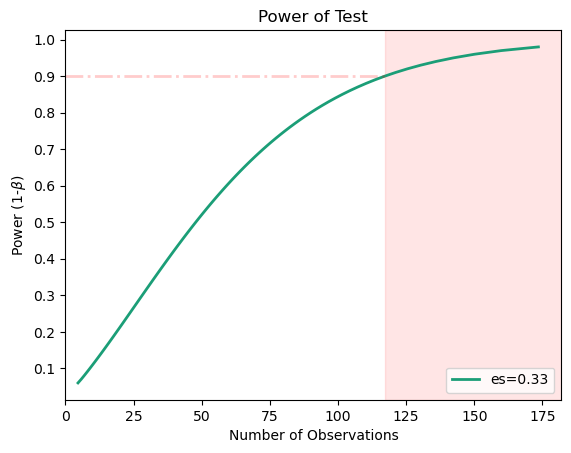

In [11]:
sm_power.FTestAnovaPower().plot_power('nobs', nobs=nobss, effect_size=[0.333], alpha=[0.05], k_groups=3)
plt.xlim([0, None])
# plt.xticks(np.append(plt.xticks()[0], math.ceil(nobss[np.isclose(powers, 0.9)][0])))
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel(r"Power (1-$\beta$)")
plt.axvspan(nobss[np.isclose(powers, 0.9)][0], plt.xticks()[0][-1], color='r', alpha=0.1)
plt.hlines(0.9, 0, nobss[np.isclose(powers, 0.9)][0], color='r', ls='-.', lw=2, alpha=0.2);

`c.`

In [12]:
nobs = math.ceil(sm_power.FTestAnovaPower().solve_power(effect_size=0.1, alpha=0.05, power=0.9, k_groups=3))
pprint(ltxt=f"\\text{{Using power analyis, number of samples required for effect size }} (f = 0.1) \\Rightarrow {nobs}")

## 5.

In [13]:
data = pd.read_csv('data/1/Table1.csv')

In [14]:
data.head()

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p
0,1,0,6.865663,93.243186,3.532821,92.849045,0.858232
1,2,0,-19.103643,90.160491,-16.177325,88.983605,0.870582
2,3,1,-15.747061,102.164439,-34.091446,93.417503,0.351061
3,4,1,6.621659,83.492126,58.531006,89.420670,0.003420
4,5,0,-12.783565,104.391452,-12.918734,113.932785,0.995077


In [15]:
alpha = 0.05

### `1. No Correction`

In [16]:
c = 'n_c'

In [17]:
data[c] = data['p'] < alpha

> `Which items differ significantly using α=0.05.?`

In [18]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c
0,4,1,6.621659,83.492126,58.531006,89.420670,0.003420,True
1,7,1,6.962812,96.066891,-35.132100,82.916984,0.021014,True
2,8,1,-5.045829,105.239143,35.892766,99.306192,0.048202,True
3,15,1,-9.250379,105.470703,-62.162545,99.005903,0.011169,True
4,17,1,5.176001,105.475429,-41.249891,79.441165,0.014606,True
5,19,1,-7.216715,126.894245,55.354562,99.668515,0.007259,True
6,22,1,10.473582,117.295995,-58.314360,99.941405,0.002122,True
7,27,1,-18.063857,90.477102,55.642084,102.978673,0.000249,True
8,30,1,16.420660,110.055172,-62.918949,98.684516,0.000255,True
9,37,0,33.910796,90.518823,-10.815471,90.254361,0.015074,True


> `How many items are false positives? Which items?`

In [19]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c
0,37,0,33.910796,90.518823,-10.815471,90.254361,0.015074,True


> `How many items are false negatives? Which items?`

In [20]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c
0,3,1,-15.747061,102.164439,-34.091446,93.417503,0.351061,False


### `2. Bonferroni FWE Correction`

In [21]:
c = 'bfwe_c'

In [22]:
data[c] = data['p'] < alpha/data.shape[0]

In [23]:
pprint(ltxt=f"\\alpha = {alpha/data.shape[0]:.5f}")

> `Which items differ significantly using α=0.05.?`

In [24]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c
0,27,1,-18.063857,90.477102,55.642084,102.978673,0.000249,True,True
1,30,1,16.420660,110.055172,-62.918949,98.684516,0.000255,True,True


> `How many items are false positives? Which items?`

In [25]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c


> `How many items are false negatives? Which items?`

In [26]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c
0,3,1,-15.747061,102.164439,-34.091446,93.417503,0.351061,False,False
1,4,1,6.621659,83.492126,58.531006,89.420670,0.003420,True,False
2,7,1,6.962812,96.066891,-35.132100,82.916984,0.021014,True,False
3,8,1,-5.045829,105.239143,35.892766,99.306192,0.048202,True,False
4,15,1,-9.250379,105.470703,-62.162545,99.005903,0.011169,True,False
5,17,1,5.176001,105.475429,-41.249891,79.441165,0.014606,True,False
6,19,1,-7.216715,126.894245,55.354562,99.668515,0.007259,True,False
7,22,1,10.473582,117.295995,-58.314360,99.941405,0.002122,True,False


### `3. Bonferroni-Holm FWE Correction`

In [27]:
c = 'bhfwe_c'

In [28]:
data = data.sort_values('p', ignore_index=True) # Sort table in ascending order of significances
# Bonferroni-Holm iteration without EXIT
data[c] = [h['p'] < alpha/(data.shape[0] - i) for i, h in data.iterrows()]
# Account for the EXIT condition in separate step by carrying over a rejection to the subsequent/following hypotheses
data[c] = [h[c] & (data[c][i-1] if i else True) for i, h in data.iterrows()]

In [29]:
pprint(ltxt=f"\\alpha = {alpha/(data.shape[0] - data.loc[~data[c]].index[0]):.5f}")

> `Which items differ significantly using α=0.05.?`

In [30]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c
0,27,1,-18.063857,90.477102,55.642084,102.978673,0.000249,True,True,True
1,30,1,16.420660,110.055172,-62.918949,98.684516,0.000255,True,True,True


> `How many items are false positives? Which items?`

In [31]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c


> `How many items are false negatives? Which items?`

In [32]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c
0,3,1,-15.747061,102.164439,-34.091446,93.417503,0.351061,False,False,False
1,4,1,6.621659,83.492126,58.531006,89.420670,0.003420,True,False,False
2,7,1,6.962812,96.066891,-35.132100,82.916984,0.021014,True,False,False
3,8,1,-5.045829,105.239143,35.892766,99.306192,0.048202,True,False,False
4,15,1,-9.250379,105.470703,-62.162545,99.005903,0.011169,True,False,False
5,17,1,5.176001,105.475429,-41.249891,79.441165,0.014606,True,False,False
6,19,1,-7.216715,126.894245,55.354562,99.668515,0.007259,True,False,False
7,22,1,10.473582,117.295995,-58.314360,99.941405,0.002122,True,False,False


### `4. Bonferroni-Hochberg FDR Correction`

In [33]:
c = 'bhfdr_c'

In [34]:
# data = data.sort_values('p', ignore_index=True) # Sort table in ascending order of significances
# Bonferroni-Hochberg iteration
data[c] = [h['p'] < alpha*(i+1)/data.shape[0] for i, h in data.iterrows()]

In [35]:
pprint(ltxt=f"\\alpha = {alpha*(data.loc[data[c]].index[-1]+2)/data.shape[0]:.5f}")

> `Which items differ significantly using α=0.05.?`

In [36]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c,bhfdr_c
0,4,1,6.621659,83.492126,58.531006,89.420670,0.003420,True,False,False,True
1,22,1,10.473582,117.295995,-58.314360,99.941405,0.002122,True,False,False,True
2,27,1,-18.063857,90.477102,55.642084,102.978673,0.000249,True,True,True,True
3,30,1,16.420660,110.055172,-62.918949,98.684516,0.000255,True,True,True,True


> `How many items are false positives? Which items?`

In [37]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c,bhfdr_c


> `How many items are false negatives? Which items?`

In [38]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c,bhfdr_c
0,3,1,-15.747061,102.164439,-34.091446,93.417503,0.351061,False,False,False,False
1,7,1,6.962812,96.066891,-35.132100,82.916984,0.021014,True,False,False,False
2,8,1,-5.045829,105.239143,35.892766,99.306192,0.048202,True,False,False,False
3,15,1,-9.250379,105.470703,-62.162545,99.005903,0.011169,True,False,False,False
4,17,1,5.176001,105.475429,-41.249891,79.441165,0.014606,True,False,False,False
5,19,1,-7.216715,126.894245,55.354562,99.668515,0.007259,True,False,False,False


## 6.

<div class="alert alert-block alert-warning">
\begin{align}
    \alpha = 0.048
\end{align}
</div>

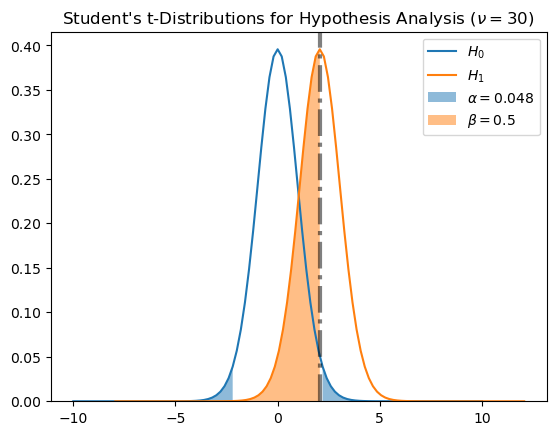

In [39]:
alpha = 0.048

x = np.linspace(-10, 10, 1+100)
df = 30

y0 = st.t(df).pdf(x)
m = -st.t.ppf(alpha/2, df)

plt.plot(x, y0, label='$H_0$')
plt.plot(x+m, y0, label='$H_1$')

plt.ylim((0, None))

plt.fill_between(x, 0, y0, abs(x)>=m, alpha=0.5, label=rf'$\alpha = {alpha}$')
plt.fill_between(x+m, 0, y0, x<=0, alpha=0.5, label=r'$\beta = 0.5$')
plt.axvline(m, c='k', ls='-.', lw=3, alpha=0.5)

plt.title(rf"Student's t-Distributions for Hypothesis Analysis ($\nu = {df}$)")
plt.legend();

# Assignment 2

## 1.

In [40]:
data = pd.read_csv('data/2/Table1.csv')

In [41]:
data.head()

,y,cov,group
0,58.629443,11.298809,1
1,45.167029,11.094228,1
2,37.777554,8.434532,1
3,49.880216,14.434979,1
4,48.472039,4.347170,1


`a.`

In [42]:
X = np.c_[np.ones(data.shape[0]), data['group'] - 1]
y = data['y'].to_numpy()

In [43]:
# Alternative Hypothesis - H_1
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
e_hat = y - y_hat
sse = e_hat @ e_hat

In [44]:
pprint(ltxt=f"\\beta = {np.array2string(beta_hat, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {sse:.5f}")

---

In [45]:
# Null Hypothesis - H_0
X_0 = np.ones(data.shape[0])[:, None]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [46]:
pprint(ltxt=f"SSE_{{H_0}} = {sse_0:.5f}")

In [47]:
# Significance Test
pprint(ltxt=f"F = {(f := ((n:=len(y)) - (p:=X.shape[1]))/(r:=1) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval := 1 - st.f.cdf(f, dfn=r, dfd=n-p)):.8f}")

`b.`

In [48]:
model = sm.OLS(y, X)
results = model.fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.32
Date:                Fri, 19 Jul 2024   Prob (F-statistic):            0.00136
Time:                        21:50:28   Log-Likelihood:                -231.50
No. Observations:                  60   AIC:                             467.0
Df Residuals:                      58   BIC:                             471.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8847      2.129     23.427      0.000      45.622      54.147
x1           -10.1323      3.011     -3.365      0.001     -16.160      -4.104
==============================================================================
Omnibus:                        4.405   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.823
Skew:                           0.616   Prob(JB):                        0.148
Kurtosis:                       3.109   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pprint(ltxt=f"\\beta = {np.array2string(results.params, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {results.ssr:.5f}")

In [51]:
pprint(ltxt=f"\\text{{Degrees of Freedom}} = {int(results.df_model)}, {int(results.df_resid)}")

In [52]:
# Significance Test
pprint(ltxt=f"F = {results.fvalue:.5f}")
pprint(ltxt=f"p = {results.f_pvalue:.8f}")

In [53]:
# Other Effect Sizes
pprint(ltxt=f"R^2 = {results.rsquared:.5f}")
pprint(ltxt=f"R^2_{{adj}} = {results.rsquared_adj:.5f}")
# pprint(ltxt=f"Cohen's\ d = {results.tvalues/np.sqrt(len(X)):.5f}")

In [54]:
pprint(txt=f"""There {"isn't" if results.f_pvalue > 0.05 else "is"} a significant effect of the drug $(p={results.f_pvalue:.8f}, F={results.fvalue:.5f})$; it {("reduces" if results.params[1] < 0 else "increases") if results.f_pvalue < 0.05 else "does not influence"} the time of the animals to find the goal.""")

`c.`

In [55]:
X = np.c_[np.ones(data.shape[0]), data['cov']]
y = data['y'].to_numpy()

In [56]:
# Alternative Hypothesis - H_1
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
e_hat = y - y_hat
sse = e_hat @ e_hat

In [57]:
pprint(ltxt=f"\\beta = {np.array2string(beta_hat, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {sse:.5f}")

---

In [58]:
# Null Hypothesis - H_0
X_0 = np.ones(data.shape[0])[:, None]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [59]:
pprint(ltxt=f"SSE_{{H_0}} = {sse_0:.5f}")

In [60]:
# Significance Test
pprint(ltxt=f"F = {(f := ((n:=len(y)) - (p:=X.shape[1]))/(r:=1) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval := 1 - st.f.cdf(f, dfn=r, dfd=n-p)):.8f}")

`d.`

In [61]:
model = sm.OLS(y, X)
results = model.fit()

In [62]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     43.61
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.35e-08
Time:                        21:50:29   Log-Likelihood:                -220.03
No. Observations:                  60   AIC:                             444.1
Df Residuals:                      58   BIC:                             448.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9826      4.297     16.751      0.000      63.381      80.584
x1            -1.9851      0.301     -6.604      0.000      -2.587      -1.383
==============================================================================
Omnibus:                        1.878   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.491
Skew:                           0.386   Prob(JB):                        0.475
Kurtosis:                       3.008   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
pprint(ltxt=f"\\beta = {np.array2string(results.params, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {results.ssr:.5f}")

In [64]:
pprint(ltxt=f"\\text{{Degrees of Freedom}} = {int(results.df_model)}, {int(results.df_resid)}")

In [65]:
# Significance Test
pprint(ltxt=f"F = {results.fvalue:.5f}")
pprint(ltxt=f"p = {results.f_pvalue:.8f}")

In [66]:
# Other Effect Sizes
pprint(ltxt=f"R^2 = {results.rsquared:.5f}")
pprint(ltxt=f"R^2_{{adj}} = {results.rsquared_adj:.5f}")
# pprint(ltxt=f"Cohen's\ d = {results.tvalues/np.sqrt(len(X)):.5f}")

In [67]:
pprint(txt=f"""There {"isn't" if results.f_pvalue > 0.05 else "is"} a significant effect of the speed of the animals $(p={results.f_pvalue:.8f}, F={results.fvalue:.5f})$; it {("reduces" if results.params[1] < 0 else "increases") if results.f_pvalue < 0.05 else "does not influence"} the time of the animals to find the goal.""")

`e.`

In [68]:
X = np.c_[np.ones(data.shape[0]), data['group'] - 1, data['cov']]
y = data['y'].to_numpy()

In [69]:
# Alternative Hypothesis - H_1
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
e_hat = y - y_hat
sse = e_hat @ e_hat

In [70]:
pprint(ltxt=f"\\beta = {np.array2string(beta_hat, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {sse:.5f}")

---

In [71]:
# Null Hypothesis 1 - H_0_1
X_0 = np.c_[np.ones(data.shape[0]), data['cov']]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [72]:
pprint(ltxt=f"SSE_{{H_{{0_1}}}} = {sse_0:.5f}")

In [73]:
# Significance Test
pprint(ltxt=f"F = {(f_1 := ((n:=len(y)) - (p:=X.shape[1]))/(r:=1) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval_1 := 1 - st.f.cdf(f_1, dfn=r, dfd=n-p)):.8f}")

---

In [74]:
# Null Hypothesis 2 - H_0_2
X_0 = np.c_[np.ones(data.shape[0]), data['group'] - 1]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [75]:
pprint(ltxt=f"SSE_{{H_{{0_2}}}} = {sse_0:.5f}")

In [76]:
# Significance Test
pprint(ltxt=f"F = {(f_2 := ((n:=len(y)) - (p:=X.shape[1]))/(r:=1) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval_2 := 1 - st.f.cdf(f_2, dfn=r, dfd=n-p)):.8f}")

`f.`

In [77]:
model = sm.OLS(y, X)
results = model.fit()

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     22.62
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           5.86e-08
Time:                        21:50:29   Log-Likelihood:                -219.32
No. Observations:                  60   AIC:                             444.6
Df Residuals:                      57   BIC:                             450.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.0490      5.026     14.933      0.000      64.985      85.113
x1             4.2748      3.663      1.167      0.248      -3.061      11.610
x2            -2.3654      0.443     -5.343      0.000      -3.252      -1.479
==============================================================================
Omnibus:                        0.895   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.704
Skew:                           0.263   Prob(JB):                        0.703
Kurtosis:                       2.936   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
pprint(ltxt=f"\\beta = {np.array2string(results.params, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {results.ssr:.5f}")

In [80]:
pprint(ltxt=f"\\text{{Degrees of Freedom}} = {int(results.df_model)}, {int(results.df_resid)}")

In [81]:
# Significance Test
pprint(ltxt=f"F = {results.fvalue:.5f}")
pprint(ltxt=f"p = {results.f_pvalue:.8f}")

In [82]:
# Other Effect Sizes
pprint(ltxt=f"R^2 = {results.rsquared:.5f}")
pprint(ltxt=f"R^2_{{adj}} = {results.rsquared_adj:.5f}")
# pprint(ltxt=f"Cohen's\ d = {results.tvalues/np.sqrt(len(X)):.5f}")

In [83]:
pprint(txt=f"""There {"isn't" if pval_1 > 0.05 else "is"} a significant effect of the drug $(p={pval_1:.8f}, F={f_1:.5f})$; it {("reduces" if results.params[1] < 0 else "increases") if pval_1 < 0.05 else "does not influence"} the time of the animals to find the goal.""")
pprint(txt=f"""There {"isn't" if pval_2 > 0.05 else "is"} a significant effect of the speed of the animals $(p={pval_2:.8f}, F={f_2:.5f})$; it {("reduces" if results.params[2] < 0 else "increases") if pval_2 < 0.05 else "does not influence"} the time of the animals to find the goal.""")

<div class="alert alert-block alert-success">
    Animals with higher running speeds can cover more distances in a shorter time and thus find the goal faster. </br></br>
    The $\beta$ (slope) values give some insight for the above conclusions, i.e. it can be seen that the slope for the drug-effect is positive which can be interpreted as -- "the drug increases (!) the time to find the goal", whereas that for the running speed is negative which interprets to lower times. 
</div>

## 2.

In [84]:
data = pd.read_csv('data/2/Table2.csv')

In [85]:
data.head()

,y,A,B
0,124.118122,1,1
1,79.961688,1,1
2,101.762006,1,1
3,98.884491,1,1
4,113.239709,1,1


`a.`

In [86]:
# Dummy Coding
data['drug1'] = data['A']
data['drug1'].replace([1], 1, inplace=True)
data['drug1'].replace([2], 0, inplace=True)
data['drug1'].replace([3], -1, inplace=True)

data['drug2'] = data['A']
data['drug2'].replace([1], 0, inplace=True)
data['drug2'].replace([2], 1, inplace=True)
data['drug2'].replace([3], -1, inplace=True)

In [87]:
X = np.c_[np.ones(data.shape[0]), data['drug1'], data['drug2']]
y = data['y'].to_numpy()

In [88]:
# Alternative Hypothesis - H_1
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
e_hat = y - y_hat
sse = e_hat @ e_hat

In [89]:
pprint(ltxt=f"\\beta = {np.array2string(beta_hat, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {sse:.5f}")

<div class="alert alert-block alert-danger">
    <b>MY QUESTION #1</b></br>
    The second slope value above changes sign if I use effect coding instead of dummy coding! I expect it to just decrease in magnitude without a sign conversion because mathmatically/geometrically, the relationship between effect coding and dummy coding is simply a scaling and shifting operation. Can you please comment on this?
</div>

---

In [90]:
# Null Hypothesis 1 - H_0
X_0 = np.ones(data.shape[0])[:, None]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [91]:
pprint(ltxt=f"SSE_{{H_0}} = {sse_0:.5f}")

In [92]:
# Significance Test
pprint(ltxt=f"F = {(f := ((n:=len(y)) - (p:=X.shape[1]))/(r:=2) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval := 1 - st.f.cdf(f, dfn=r, dfd=n-p)):.8f}")

In [93]:
pprint(txt=f"""There {"isn't" if pval > 0.05 else "is"} a significant effect of the drugs $(p={pval:.8f}, F={f:.5f})$; drug1 {("reduces" if beta_hat[1] < 0 else "increases") if pval < 0.05 else "does not influence"} intelligence and drug2 {("reduces" if beta_hat[2] < 0 else "increases") if pval < 0.05 else "does not influence"} intelligence.""")

`b.`

<div class="alert alert-block alert-danger">
    <b>MY QUESTION #2</b></br>
    I don't see why effect coding is "required" and why dummy coding cannot be used as long as interation components are properly added. I wrote down the effects (linear combination of slopes) for all the cases for both types of coding, and it seems that for each of them the effects can be quantified with some *unique* combination of the slopes, so I'd think that either of them can be used and just the interpretation of the slopes for effects would be different.
</div>

In [94]:
# Interaction Coding (Dummy)
data['gender'] = data['B']
data['gender'].replace([1], -1, inplace=True)
data['gender'].replace([2], 1, inplace=True)

data['drug1_gender'] = data['drug1'] * data['gender']
data['drug2_gender'] = data['drug2'] * data['gender']

In [95]:
X = np.c_[np.ones(data.shape[0]), data['drug1'], data['drug2'], data['gender'], data['drug1_gender'], data['drug2_gender']]
y = data['y'].to_numpy()

In [96]:
# Alternative Hypothesis - H_1
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
e_hat = y - y_hat
sse = e_hat @ e_hat

In [97]:
pprint(ltxt=f"\\beta = {np.array2string(beta_hat, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {sse:.5f}")

---

In [98]:
# Null Hypothesis 1 - H_0
X_0 = np.c_[np.ones(data.shape[0]), data['gender'], data['drug1_gender'], data['drug2_gender']]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [99]:
pprint(ltxt=f"SSE_{{H_{{0_1}}}} = {sse_0:.5f}")

In [100]:
# Significance Test
pprint(ltxt=f"F = {(f_1 := ((n:=len(y)) - (p:=X.shape[1]))/(r:=2) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval_1 := 1 - st.f.cdf(f_1, dfn=r, dfd=n-p)):.8f}")

---

In [101]:
# Null Hypothesis 2 - H_0
X_0 = np.c_[np.ones(data.shape[0]), data['drug1'], data['drug2'], data['drug1_gender'], data['drug2_gender']]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [102]:
pprint(ltxt=f"SSE_{{H_{{0_2}}}} = {sse_0:.5f}")

In [103]:
# Significance Test
pprint(ltxt=f"F = {(f_2 := ((n:=len(y)) - (p:=X.shape[1]))/(r:=1) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval_2 := 1 - st.f.cdf(f_2, dfn=r, dfd=n-p)):.8f}")

---

In [104]:
# Null Hypothesis 3 - H_0
X_0 = np.c_[np.ones(data.shape[0]), data['drug1'], data['drug2'], data['gender']]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [105]:
pprint(ltxt=f"SSE_{{H_{{0_3}}}} = {sse_0:.5f}")

In [106]:
# Significance Test
pprint(ltxt=f"F = {(f_3 := ((n:=len(y)) - (p:=X.shape[1]))/(r:=2) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval_3 := 1 - st.f.cdf(f_3, dfn=r, dfd=n-p)):.8f}")

In [107]:
pprint(txt=f"""There {"isn't" if pval_1 > 0.05 else "is"} a significant effect of the drugs $(p={pval_1:.8f}, F={f_1:.5f})$.""")
pprint(txt=f"""There {"isn't" if pval_2 > 0.05 else "is"} a significant effect of gender $(p={pval_2:.8f}, F={f_2:.5f})$.""")
pprint(txt=f"""There {"isn't" if pval_3 > 0.05 else "is"} a significant effect of the drug-gender interactions $(p={pval_3:.8f}, F={f_3:.5f})$.""")

# Assignment 3

> Added July 19, 2024

## 1.

In [108]:
data = pd.read_csv('data/3/Table1.csv')

In [109]:
data.head()

,GroupA,GroupB
0,72.194926,75.628366
1,66.949193,65.292139
2,70.619039,68.209072
3,66.427349,71.732184
4,65.895107,67.537972


In [110]:
# Significance test
t_stat, p_value = st.ttest_ind(data['GroupA'], data['GroupB'])
pprint("T-Test Result", ltxt=f"t = {t_stat:.5f},\\\\p = {p_value:.8f}")

In [111]:
def permutation_test(groupA, groupB, num_permutations=10000, *, repeated_measures=False, plot_dist=True, bins=100):
    if repeated_measures:
        assert len(groupA) == len(groupB), 'Both groups must have the same number of samples for repeated measures.'
    
    observed_diff = np.mean(groupA) - np.mean(groupB)

    stacked = np.r_[groupA, groupB]
    distribution = []
    count = 0
    for _ in range(num_permutations):
        if repeated_measures:
            signs = np.random.choice([-1, 1], size=len(groupA))
            new_diff = np.r_[signs, -signs] @ stacked / len(groupA)
        else:
            np.random.shuffle(stacked)
            new_groupA = stacked[:len(groupA)]
            new_groupB = stacked[len(groupA):]
            new_diff = np.mean(new_groupA) - np.mean(new_groupB)

        distribution.append(new_diff)
        if abs(new_diff) >= abs(observed_diff):
            count += 1

    if plot_dist:
        plt.hist(distribution, bins=bins, density=True)
        plt.axvline(observed_diff, c='r', ls='-.', lw=2)
        plt.title(f"{num_permutations} Permutation Test Distribution{' (Repeated Measures)' if repeated_measures else ''}")
        plt.xlabel("Difference in Means")
        plt.ylabel("Probability Density")
        plt.show()

    return count / num_permutations

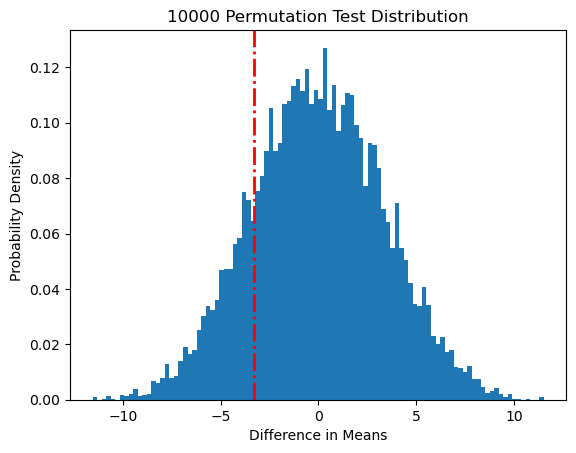

In [112]:
# Permutation test
pprint("Permutation Test Result", f"p = {permutation_test(data['GroupA'], data['GroupB']):.8f}")

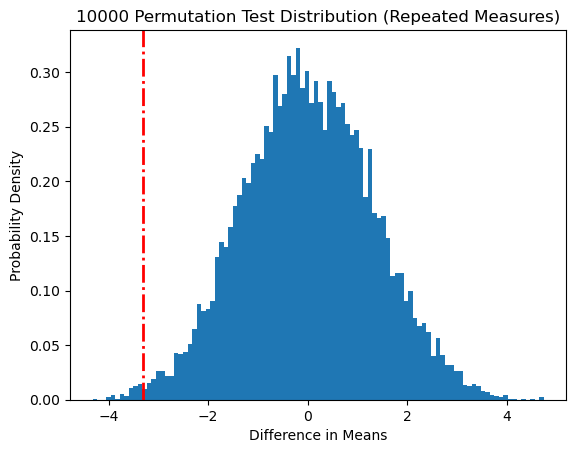

In [113]:
# Permutations test for repeated measures
pprint("Permutation Test Result", f"p = {permutation_test(data['GroupA'], data['GroupB'], repeated_measures=True):.8f}")

## 2.

In [114]:
data = pd.read_csv('data/3/Table2.csv')

In [115]:
data.head()

,x,y
0,0.026495,-0.641899
1,0.119065,1.036808
2,-0.457300,0.204774
3,0.066706,-0.182882
4,1.431809,2.034713


In [116]:
def bootstrap_correlation(seriesA, seriesB, *, alpha=0.05, num_bootstrap=10000):
    assert len(seriesA) == len(seriesB), 'Both series must have the same number of samples.'

    bootstrap_samples = []
    for _ in range(num_bootstrap):
        sample_indices = np.random.randint(0, len(seriesA), len(seriesA))
        sampleA, sampleB = seriesA[sample_indices], seriesB[sample_indices]
        sample_corr, _ = st.pearsonr(sampleA, sampleB)
        bootstrap_samples.append(sample_corr)
    
    return np.percentile(bootstrap_samples, [50 * alpha, 50 * (2 - alpha)])

In [117]:
# Confidence interval using bootstrap
pprint(f"95% Confidence Interval = ${bootstrap_correlation(data['x'], data['y'])}$.")

In [118]:
# Correlation and its significance
correlation, p_value = st.pearsonr(data['x'], data['y'])
pprint(f"""The correlation $(r={correlation:0.5f})$ {"isn't" if p_value > 0.05 else "is"} significantly different from zero $(p={p_value:.8f})$.""")

## 3.

In [119]:
data = pd.read_csv('data/3/Table3.csv')

In [120]:
data.head()

,Outcome,Clinic,Treatment
0,5.18,1,1
1,6.19,1,1
2,5.40,1,1
3,4.17,1,1
4,5.41,1,1


In [121]:
X = np.c_[np.ones(data.shape[0]),
          data['Clinic'].replace([1, 2], [0, 1]),
          data['Treatment'].replace([1, 2], [0, 1]),
          data['Clinic'].replace([1, 2], [0, 1]) * data['Treatment'].replace([1, 2], [0, 1])]
y = data['Outcome'].to_numpy()

In [122]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.690
Date:                Fri, 19 Jul 2024   Prob (F-statistic):             0.0140
Time:                        21:50:52   Log-Likelihood:                -174.58
No. Observations:                 120   AIC:                             357.2
Df Residuals:                     116   BIC:                             368.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0787      0.192     26.385      0.000       4.697       5.460
x1             0.0320      0.272      0.118      0.907      -0.507       0.571
x2             0.6023      0.272      2.213      0.029       0.063       1.141
x3             0.0677      0.385      0.176      0.861      -0.695       0.830
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.556
Skew:                           0.011   Prob(JB):                        0.459
Kurtosis:                       2.442   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

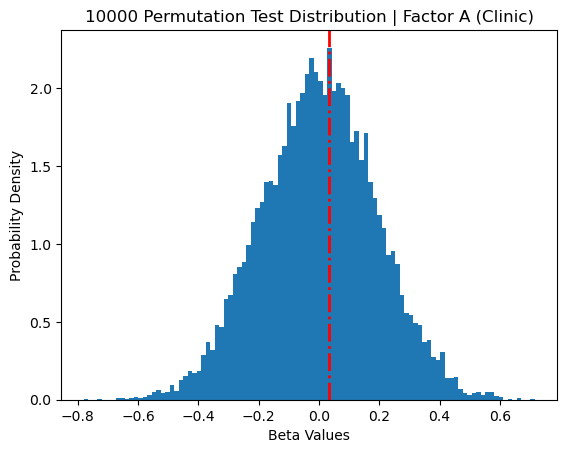

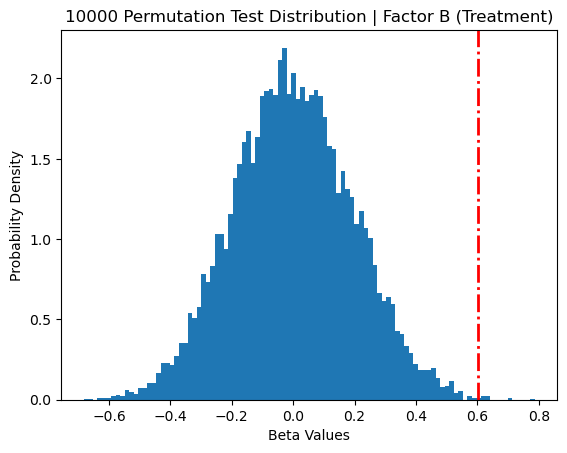

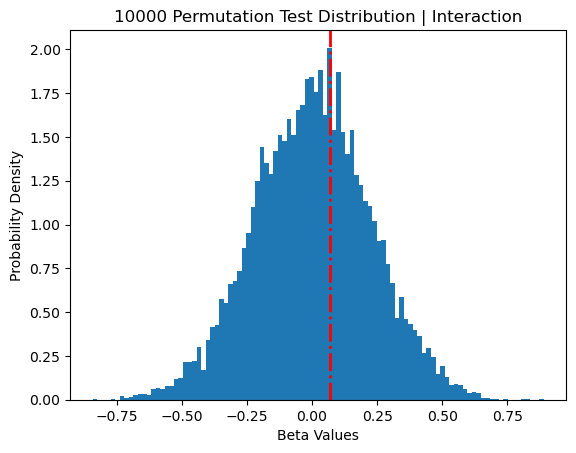

In [123]:
# Permutation Test
num_permutations = 10000

betas_original = results.params

for i, category in zip(range(1, X.shape[1]), ['Factor A (Clinic)', 'Factor B (Treatment)', 'Interaction']):
    distribution = []
    count = 0

    for _ in range(num_permutations):
        X_perm = X.copy()
        np.random.shuffle(X_perm[:, i])
        results_perm = sm.OLS(y, X_perm).fit()
        beta_perm = results_perm.params[i]

        distribution.append(beta_perm)
        if abs(beta_perm) >= abs(betas_original[i]):
            count += 1

    plt.hist(distribution, bins=100, density=True)
    plt.axvline(betas_original[i], c='r', ls='-.', lw=2)
    plt.title(f"{num_permutations} Permutation Test Distribution | {category}")
    plt.xlabel("Beta Values")
    plt.ylabel("Probability Density")
    plt.show()

    pvalue = count / num_permutations
    pprint(f"""{category} {"doesn't have" if pvalue > 0.05 else "has"} a significant effect $(p={pvalue:.8f})$ on the treatment outcome.""")